1. Predicting Diabetes Onset Using Logistic Regression
   Dataset: 
Diabetes Dataset   
Preprocessing Steps:
Handle missing values if any.
Standardize features.
Encode categorical variables if any.
  Task:
Implement logistic regression to predict diabetes onset and evaluate the model using accuracy, precision, and recall.




In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

diabetesData = pd.read_csv("diabetes.csv")
print(diabetesData)

print("Null values in the dataset=\n ", diabetesData.isnull().sum())
print("Datast info:\n ", diabetesData.info())
#There are no null values in the dataset

scaler = StandardScaler()
X = diabetesData.drop('Outcome', axis=1)
XScaled = scaler.fit_transform(X)
y = diabetesData['Outcome']

X_train, X_test, y_train, y_test= train_test_split(XScaled, y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score=  {accuracy:.2f}')

precision = precision_score(y_test, y_pred)
print(f'Precision score= {precision:.2f}')

recall = recall_score(y_test, y_pred)
print(f'Recall score= {recall:.2f}')

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

3. Predicting Titanic Survival Using Logistic Regression
   Dataset: 
Titanic Dataset
   Preprocessing Steps:
Handle missing values (e.g., fill missing ages with median).
Encode categorical variables (e.g., one-hot encoding for embarked and gender).
Standardize numerical features.
   Task:
Implement logistic regression to predict survival on the Titanic and evaluate the model using ROC-AUC.





     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

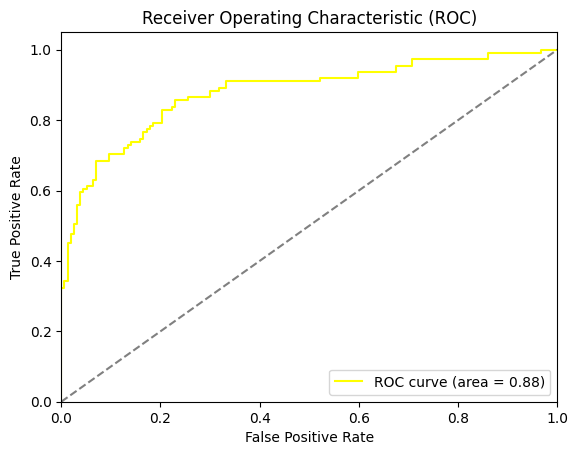

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

titanicData = pd.read_csv('titanic.csv')
print(titanicData)
droppedNullval = titanicData.dropna()

titanicData['Age'].fillna(titanicData['Age'].median(), inplace=True)
titanicData['Fare'].fillna(titanicData['Fare'].median(), inplace=True)
titanicData['Embarked'].fillna(titanicData['Embarked'].mode()[0], inplace=True)

titanicData.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

X = titanicData.drop('Survived', axis=1)
y = titanicData['Survived']

titanicData['Sex'] = titanicData['Sex'].map({'male': 0, 'female': 1})
embarked_dummies = pd.get_dummies(titanicData['Embarked'], prefix='Embarked')
titanicData = pd.concat([titanicData, embarked_dummies], axis=1)
titanicData.drop('Embarked', axis=1, inplace=True)

X = titanicData.drop('Survived', axis=1)
y = titanicData['Survived']

scaler = StandardScaler()
X[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']] = scaler.fit_transform(X[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

y_predProba = model.predict_proba(X_test)[:, 1]
rocAuc = roc_auc_score(y_test, y_predProba)
print(f'ROC-AUC: {rocAuc:.2f}')
fpr, tpr, _ = roc_curve(y_test, y_predProba)

plt.figure()
plt.plot(fpr, tpr, color='yellow', label=f'ROC curve (area = {rocAuc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


5. Predicting Customer Satisfaction Using Logistic Regression
Dataset: 
Customer Satisfaction Dataset
Preprocessing Steps:
Handle missing values (e.g., fill missing values with median).
Encode categorical variables (e.g., one-hot encoding for region).
Standardize numerical features.
Task: 
Implement logistic regression to predict customer satisfaction and evaluate the model using accuracy and confusion matrix.




In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

customerData = pd.read_csv('Customer-survey-data.csv')
print(customerData)
print(customerData.info())

customerData['Overall Delivery Experience (Rating)'].fillna(customerData['Overall Delivery Experience (Rating)'].mean(), inplace=True)
customerData['Food Quality (Rating)'].fillna(customerData['Food Quality (Rating)'].mean(), inplace=True)
customerData['Speed of Delivery (Rating)'].fillna(customerData['Speed of Delivery (Rating)'].mean(), inplace=True)  # Correct column name

customerData = pd.get_dummies(customerData, columns=['Order Accuracy'], drop_first=True)

numerical_cols = ['Overall Delivery Experience (Rating)', 'Food Quality (Rating)', 'Speed of Delivery (Rating)']
scaler = StandardScaler()
customerData[numerical_cols] = scaler.fit_transform(customerData[numerical_cols])

X = customerData.drop('Order Accuracy_Yes', axis=1) 
y = customerData['Order Accuracy_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score: {accuracy:.2f}')

confusionMatrix = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix, display_labels=['No', 'Yes'])
display.plot(cmap=plt.cm.Reds)
plt.title('Confusion Matrix')
plt.show()


       Customer ID  Overall Delivery Experience (Rating)  \
0                1                                   5.0   
1                2                                   3.0   
2                3                                   4.0   
3                4                                   5.0   
4                5                                   2.0   
...            ...                                   ...   
10611        10612                                   4.0   
10612        10613                                   3.0   
10613        10614                                   5.0   
10614        10615                                   3.0   
10615        10616                                   1.0   

       Food Quality (Rating)  Speed of Delivery (Rating) Order Accuracy  
0                        3.0                         4.0            Yes  
1                        4.0                         3.0            Yes  
2                        5.0                         2.0 

AttributeError: module 'matplotlib.cm' has no attribute 'Pinks'

2. Classifying Iris Species Using Decision Trees
   Dataset: 
Iris Dataset
   Preprocessing Steps:
Handle missing values if any.
Standardize features.
Encode categorical variables if any.
   Task: 
Implement a decision tree classifier to classify iris species and evaluate the model using confusion matrix and accuracy.




   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64
Accuracy score: 1.00


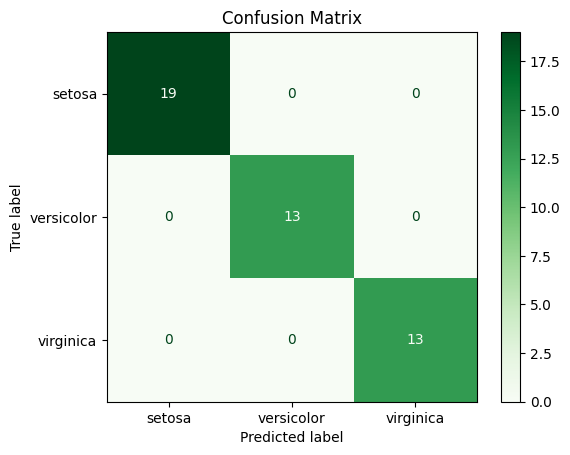

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
iris = load_iris()
irisData = pd.DataFrame(data=iris.data, columns=iris.feature_names)
irisData['species'] = iris.target

print(irisData.head())

print(irisData.isnull().sum())

scaler = StandardScaler()
irisData[iris.feature_names] = scaler.fit_transform(irisData[iris.feature_names])

X = irisData.drop('species', axis=1)
y = irisData['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

confusionMatrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy score: {accuracy:.2f}')

display = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix, display_labels=iris.target_names)
display.plot(cmap=plt.cm.Greens)
plt.title('Confusion Matrix')
plt.show()


4. Classifying Emails as Spam Using Decision Trees

Dataset: 
Spam Email Dataset
Preprocessing Steps:
Handle missing values if any.
Standardize features.
Encode categorical variables if present.
Task: 
Implement a decision tree classifier to classify emails as spam or not and evaluate the model using precision, recall, and F1-score.




In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

emailsData = pd.read_csv('emails.csv')
print(emailsData)
print(emailsData.info())

X = emailsData['text']
y = emailsData['spam']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_trainTfidf = vectorizer.fit_transform(X_train)
X_testTfidf = vectorizer.transform(X_test)

dtClassifier = DecisionTreeClassifier(random_state=42)

dtClassifier.fit(X_trainTfidf, y_train)

y_pred = dtClassifier.predict(X_testTfidf)

classReport = classification_report(y_test, y_pred)
print("Classification Report\n", classReport)


                                                   text  spam
0     Subject: naturally irresistible your corporate...     1
1     Subject: the stock trading gunslinger  fanny i...     1
2     Subject: unbelievable new homes made easy  im ...     1
3     Subject: 4 color printing special  request add...     1
4     Subject: do not have money , get software cds ...     1
...                                                 ...   ...
5723  Subject: re : research and development charges...     0
5724  Subject: re : receipts from visit  jim ,  than...     0
5725  Subject: re : enron case study update  wow ! a...     0
5726  Subject: re : interest  david ,  please , call...     0
5727  Subject: news : aurora 5 . 2 update  aurora ve...     0

[5728 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728